<a href="https://colab.research.google.com/github/godartg/machine-learning-DMC/blob/main/Trabajo_final_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [2]:
pddf = pd.read_csv('ifood_df.csv')

In [3]:
pddf.shape

(2205, 39)

In [4]:
pddf.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [5]:
pddf.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [6]:
#Muestra las primeras 10 filas del dataframe
pddf.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,...,1,0,0,0,0,0,1,36,23,1


In [7]:
#muestra las 10 últimas filas
pddf.tail(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2195,24434.0,2,0,9,3,2,8,20,0,17,...,0,0,0,0,1,0,0,33,16,0
2196,11012.0,1,0,82,24,3,26,7,1,23,...,0,0,0,0,1,0,0,61,38,1
2197,44802.0,0,0,71,853,10,143,13,10,20,...,0,0,0,0,0,1,0,1029,1009,0
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2199,34421.0,1,0,81,3,3,7,6,2,9,...,0,0,0,0,1,0,0,21,12,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [8]:
#Resumen estadístico
pddf.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [9]:
pddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Prueba1

In [113]:
features= list(set(pddf.columns.tolist()) - set(['Income','AcceptedCmp1']))

In [114]:
features

['Kidhome',
 'MntRegularProds',
 'education_Master',
 'Customer_Days',
 'education_PhD',
 'MntTotal',
 'Response',
 'AcceptedCmp3',
 'AcceptedCmp2',
 'Recency',
 'Age',
 'NumCatalogPurchases',
 'education_2n Cycle',
 'Z_Revenue',
 'marital_Together',
 'AcceptedCmp5',
 'AcceptedCmpOverall',
 'education_Graduation',
 'MntGoldProds',
 'marital_Divorced',
 'MntFishProducts',
 'Teenhome',
 'NumWebPurchases',
 'MntMeatProducts',
 'NumStorePurchases',
 'marital_Married',
 'education_Basic',
 'AcceptedCmp4',
 'MntWines',
 'Complain',
 'MntSweetProducts',
 'marital_Single',
 'NumDealsPurchases',
 'MntFruits',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'marital_Widow']

In [115]:
from sklearn.model_selection import train_test_split
X = pddf[features]
y = pddf.AcceptedCmp1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Crear y Entrenar el Modelo de Random Forest:

In [182]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 123, min_samples_leaf = 6)

In [183]:
#Entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=6, n_estimators=10, random_state=123)

In [184]:
#presición promedio
rf_model.score(X_test, y_test)

0.9523809523809523

Realizar Predicciones:

In [185]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

Evaluar el Modelo:

In [186]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluar la precisión del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))

# Otros resultados como la matriz de confusión y el informe de clasificación
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9523809523809523
Confusion Matrix:
 [[412   5]
 [ 16   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       417
           1       0.62      0.33      0.43        24

    accuracy                           0.95       441
   macro avg       0.79      0.66      0.70       441
weighted avg       0.94      0.95      0.95       441



In [187]:
import seaborn as sns

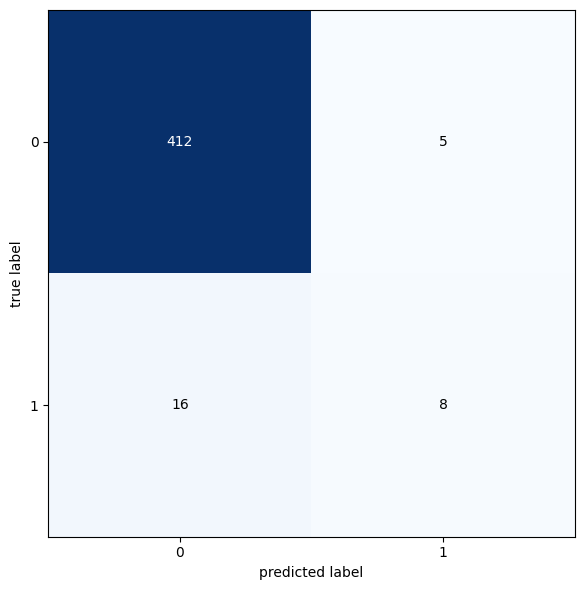

In [188]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat= matriz, figsize=(6,6), show_normed=False )
plt.tight_layout()

In [189]:
import matplotlib.pyplot as plt

In [190]:
# Obtener importancia de las características
feature_importances = rf_model.feature_importances_
feature_importances

array([0.00517303, 0.06632237, 0.00031513, 0.02479671, 0.00525555,
       0.13706477, 0.04785859, 0.00517284, 0.        , 0.01517595,
       0.01878239, 0.06492375, 0.00439275, 0.        , 0.00077884,
       0.04450218, 0.25940588, 0.00410952, 0.01767967, 0.        ,
       0.04387337, 0.01457363, 0.01611031, 0.01471465, 0.00953974,
       0.00442057, 0.        , 0.0297612 , 0.04875447, 0.        ,
       0.02774713, 0.00325994, 0.01231931, 0.01777338, 0.03544241,
       0.        , 0.        ])

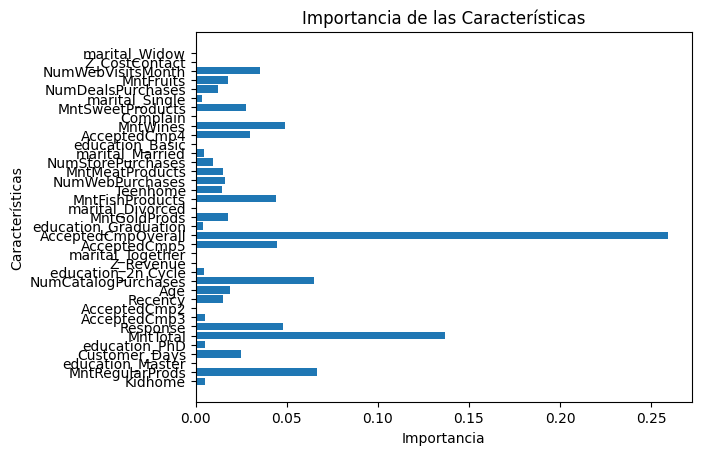

<Figure size 1000x1100 with 0 Axes>

In [191]:
plt.barh(features, feature_importances)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.figure(figsize=(10, 11))  # Ajusta el tamaño de la figura
plt.show()

In [192]:
importances = pd.DataFrame({'features' : features ,
                            'importance' : feature_importances}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
16,AcceptedCmpOverall,0.259406
5,MntTotal,0.137065
1,MntRegularProds,0.066322
11,NumCatalogPurchases,0.064924
28,MntWines,0.048754
6,Response,0.047859
15,AcceptedCmp5,0.044502
20,MntFishProducts,0.043873
34,NumWebVisitsMonth,0.035442
27,AcceptedCmp4,0.029761


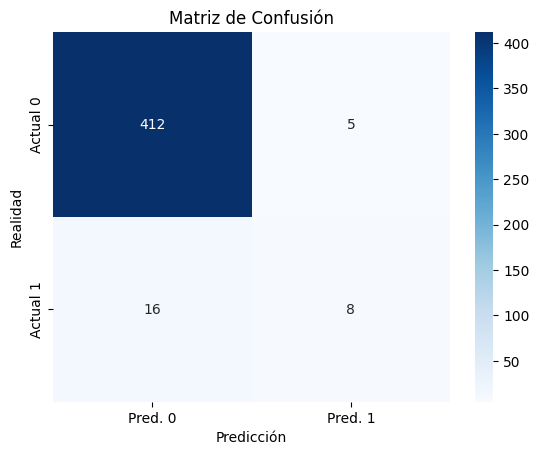

In [193]:
sns.heatmap(matriz, annot=True, fmt='g', cmap='Blues', xticklabels=['Pred. 0', 'Pred. 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

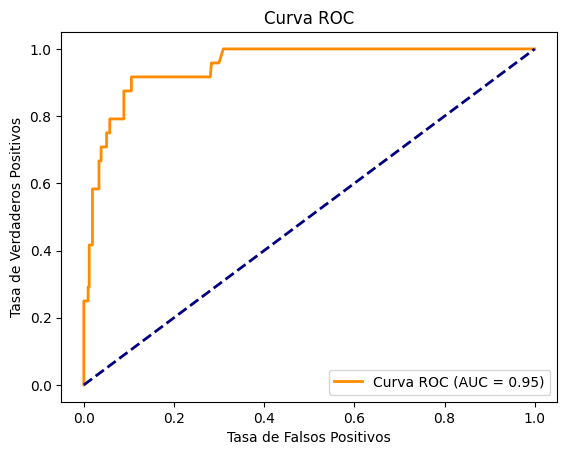

In [194]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades de predicción
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()